**Principal Component Analysis (PCA) Theory**

PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible.

**🎯 Core Concept:**
PCA finds the directions (principal components) along which the data varies the most. These principal components are orthogonal vectors that form a new coordinate system.

**📊 Mathematical Foundation:**

**1. Data Standardization:**
Before PCA, features should be standardized (zero mean, unit variance):
$$\mathbf{X}_{std} = \frac{\mathbf{X} - \mu}{\sigma}$$

**2. Covariance Matrix:**
The covariance matrix captures relationships between features:
$$\mathbf{C} = \frac{1}{n-1} \mathbf{X}_{std}^T \mathbf{X}_{std}$$

**3. Eigenvalue Decomposition:**
Find eigenvalues (λ) and eigenvectors (v) of the covariance matrix:
$$\mathbf{C} \mathbf{v} = \lambda \mathbf{v}$$

**🔑 Key Concepts:**

**Eigenvectors (Principal Components):**
- Directions of maximum variance in the data
- Orthogonal (perpendicular) to each other
- Form the new coordinate axes
- First PC captures most variance, second PC captures second most, etc.

**Eigenvalues (Variance Explained):**
- Measure how much variance each PC captures
- Larger eigenvalue = more important PC
- Total variance = sum of all eigenvalues
- Explained variance ratio = λᵢ / Σλ

**📈 PCA Algorithm:**

1. **Standardize** the data
2. **Compute** covariance matrix
3. **Calculate** eigenvalues and eigenvectors
4. **Sort** eigenvectors by decreasing eigenvalues
5. **Select** top k eigenvectors (principal components)
6. **Transform** data to new coordinate system

**💡 Variance Preservation:**

The first principal component captures the direction of maximum variance:
$$\mathbf{PC}_1 = \arg\max_{\|\mathbf{v}\|=1} \mathbf{v}^T \mathbf{C} \mathbf{v}$$

Subsequent components are orthogonal and capture remaining variance:
$$\mathbf{PC}_k = \arg\max_{\|\mathbf{v}\|=1, \mathbf{v} \perp \mathbf{PC}_1, \dots, \mathbf{PC}_{k-1}} \mathbf{v}^T \mathbf{C} \mathbf{v}$$

**📊 Scree Plot:**
A scree plot shows eigenvalues in descending order, helping decide how many PCs to keep (elbow method).

**🎯 Applications:**
- **Dimensionality Reduction:** Reduce features while preserving variance
- **Noise Reduction:** Remove components with low variance (noise)
- **Visualization:** Plot high-dimensional data in 2D/3D
- **Feature Extraction:** Create uncorrelated features
- **Data Compression:** Efficient storage with minimal information loss

**⚖️ Trade-offs:**
- **Pros:** Unsupervised, preserves variance, reduces dimensionality
- **Cons:** Linear technique, may lose non-linear relationships, less interpretable features

**🔍 Choosing Number of Components:**
- **Variance Threshold:** Keep 95% of total variance
- **Elbow Method:** Look for natural break in scree plot
- **Cross-validation:** Test different numbers of components

**Wine Dataset for PCA**

The Wine dataset contains chemical analysis results of 178 wines from 3 different cultivars in Italy. Each wine has 13 chemical measurements (alcohol content, acidity, phenols, etc.). This dataset has 13 features, making it excellent for demonstrating PCA's dimensionality reduction capabilities on real chemical data.

In [10]:
# Import Wine Dataset for Advanced PCA Demonstration

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
feature_names_wine = wine.feature_names
target_names_wine = wine.target_names

print("Wine Dataset Loaded Successfully!")
print("=" * 50)
print(f"Samples: {X_wine.shape[0]}")
print(f"Features: {X_wine.shape[1]}")
print(f"Classes: {len(target_names_wine)}")
print()
print(f"Wine classes ({len(target_names_wine)} total)")
for i, name in enumerate(target_names_wine, 1):
    print(f"  {i}. {name}")
print()
print(f"Chemical Features ({X_wine.shape[1]} total):")
for i, name in enumerate(feature_names_wine, 1):
    print(f"  {i}. {name}")

Wine Dataset Loaded Successfully!
Samples: 178
Features: 13
Classes: 3

Wine classes (3 total)
  1. class_0
  2. class_1
  3. class_2

Chemical Features (13 total):
  1. alcohol
  2. malic_acid
  3. ash
  4. alcalinity_of_ash
  5. magnesium
  6. total_phenols
  7. flavanoids
  8. nonflavanoid_phenols
  9. proanthocyanins
  10. color_intensity
  11. hue
  12. od280/od315_of_diluted_wines
  13. proline


🍷 PCA Implementation on Wine Dataset
📊 Explained Variance by Each Component:
----------------------------------------
PC1: 0.3620 (36.2%) | Cumulative: 0.3620 (36.2%)
PC2: 0.1921 (19.2%) | Cumulative: 0.5541 (55.4%)
PC3: 0.1112 (11.1%) | Cumulative: 0.6653 (66.5%)
PC4: 0.0707 (7.1%) | Cumulative: 0.7360 (73.6%)
PC5: 0.0656 (6.6%) | Cumulative: 0.8016 (80.2%)
PC6: 0.0494 (4.9%) | Cumulative: 0.8510 (85.1%)
PC7: 0.0424 (4.2%) | Cumulative: 0.8934 (89.3%)
PC8: 0.0268 (2.7%) | Cumulative: 0.9202 (92.0%)
PC9: 0.0222 (2.2%) | Cumulative: 0.9424 (94.2%)
PC10: 0.0193 (1.9%) | Cumulative: 0.9617 (96.2%)
PC11: 0.0174 (1.7%) | Cumulative: 0.9791 (97.9%)
PC12: 0.0130 (1.3%) | Cumulative: 0.9920 (99.2%)
PC13: 0.0080 (0.8%) | Cumulative: 1.0000 (100.0%)

🎯 Components needed for 95% variance: 10
   This reduces 13 features to 10 components



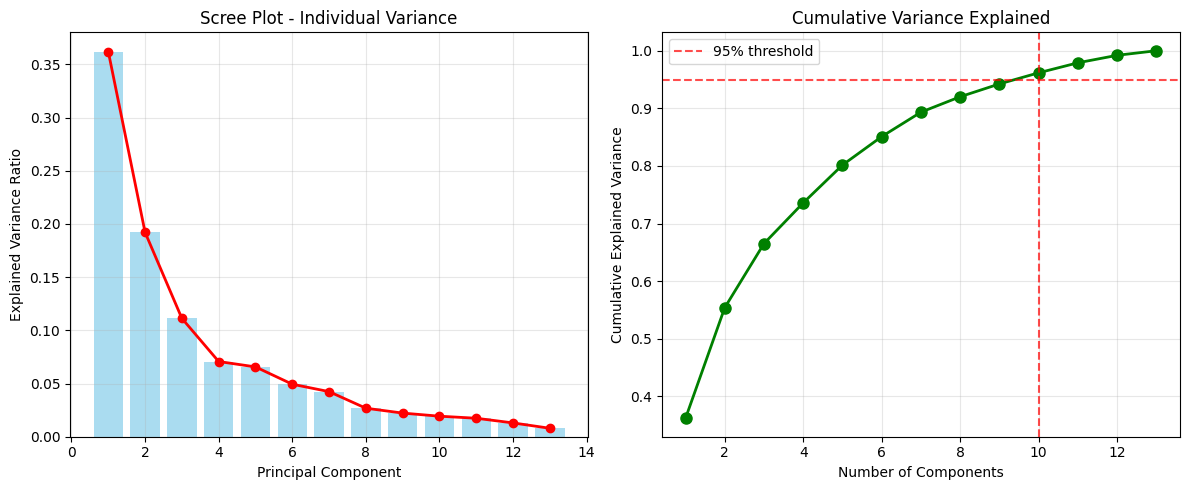

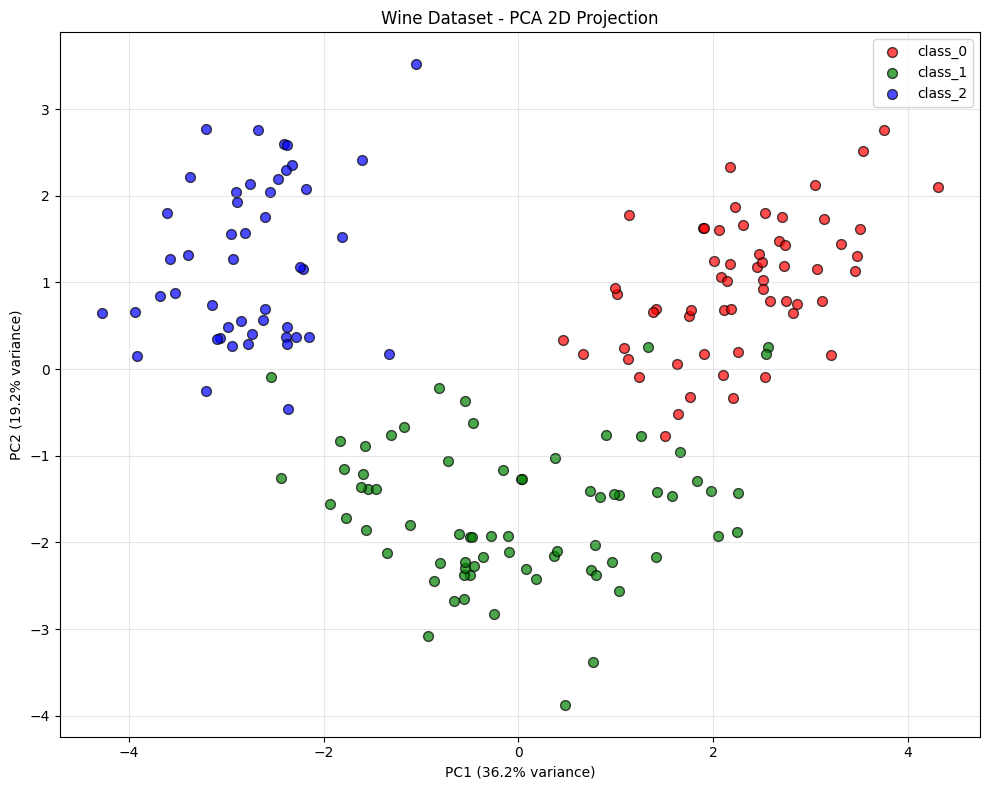

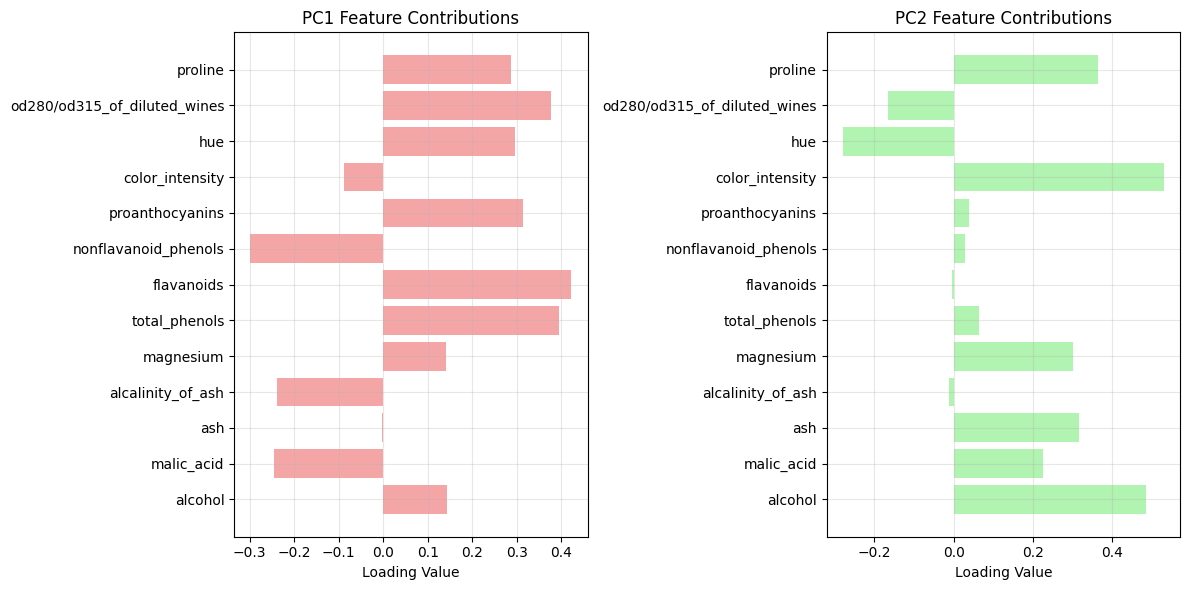

🔍 Feature Contributions Analysis:
----------------------------------------
PC1 (horizontal axis) is most influenced by:
  flavanoids: 0.423
  total_phenols: 0.395
  od280/od315_of_diluted_wines: 0.376

PC2 (vertical axis) is most influenced by:
  color_intensity: 0.530
  alcohol: 0.484
  proline: 0.365

✅ PCA Summary:
   Original dimensions: 13 features
   Reduced to: 10 components (95% variance preserved)


In [12]:
# Implement PCA on Wine Dataset

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

print("🍷 PCA Implementation on Wine Dataset")
print("=" * 50)

# Apply PCA
pca = PCA()
X_wine_pca = pca.fit_transform(X_wine_scaled)

# Get explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("📊 Explained Variance by Each Component:")
print("-" * 40)
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"PC{i}: {var:.4f} ({var*100:.1f}%) | Cumulative: {cum_var:.4f} ({cum_var*100:.1f}%)")
print()

# Determine optimal number of components
# Rule of thumb: Keep components that explain at least 95% of variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"🎯 Components needed for 95% variance: {n_components_95}")
print(f"   This reduces 13 features to {n_components_95} components")
print()

# Scree plot
plt.figure(figsize=(12, 5))

# Plot 1: Individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue')
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'ro-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Individual Variance')
plt.grid(True, alpha=0.3)

# Plot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'go-', linewidth=2, markersize=8)
plt.axhline(y=0.95, color='red', linestyle='--', alpha=0.7, label='95% threshold')
plt.axvline(x=n_components_95, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2D PCA visualization
pca_2d = PCA(n_components=2)
X_wine_pca_2d = pca_2d.fit_transform(X_wine_scaled)

plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']
for i, (name, color) in enumerate(zip(target_names_wine, colors)):
    mask = y_wine == i
    plt.scatter(X_wine_pca_2d[mask, 0], X_wine_pca_2d[mask, 1],
               c=color, label=name, alpha=0.7, s=50, edgecolors='black')

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Wine Dataset - PCA 2D Projection')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show feature contributions to first two PCs
plt.figure(figsize=(12, 6))

# PC1 loadings
plt.subplot(1, 2, 1)
loadings_pc1 = pca.components_[0]
plt.barh(range(len(feature_names_wine)), loadings_pc1, color='lightcoral', alpha=0.7)
plt.yticks(range(len(feature_names_wine)), feature_names_wine)
plt.xlabel('Loading Value')
plt.title('PC1 Feature Contributions')
plt.grid(True, alpha=0.3)

# PC2 loadings
plt.subplot(1, 2, 2)
loadings_pc2 = pca.components_[1]
plt.barh(range(len(feature_names_wine)), loadings_pc2, color='lightgreen', alpha=0.7)
plt.yticks(range(len(feature_names_wine)), feature_names_wine)
plt.xlabel('Loading Value')
plt.title('PC2 Feature Contributions')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 Feature Contributions Analysis:")
print("-" * 40)
print("PC1 (horizontal axis) is most influenced by:")
pc1_top = np.argsort(np.abs(loadings_pc1))[-3:][::-1]
for idx in pc1_top:
    print(f"  {feature_names_wine[idx]}: {loadings_pc1[idx]:.3f}")

print("\nPC2 (vertical axis) is most influenced by:")
pc2_top = np.argsort(np.abs(loadings_pc2))[-3:][::-1]
for idx in pc2_top:
    print(f"  {feature_names_wine[idx]}: {loadings_pc2[idx]:.3f}")

print(f"\n✅ PCA Summary:")
print(f"   Original dimensions: {X_wine.shape[1]} features")
print(f"   Reduced to: {n_components_95} components (95% variance preserved)")

**K-Means Clustering**

K-means is a popular unsupervised learning algorithm that partitions data into k distinct clusters. Each observation belongs to the cluster with the nearest mean (centroid).

**🎯 How K-Means Works:**

1. **Initialize** k centroids randomly
2. **Assign** each point to the nearest centroid
3. **Update** centroids as the mean of points in each cluster
4. **Repeat** steps 2-3 until convergence (centroids don't change)

**📊 Key Concepts:**
- **Centroid**: Center point of each cluster
- **Within-cluster sum of squares (WCSS)**: Measures cluster tightness
- **Elbow Method**: Find optimal k by plotting WCSS vs k
- **Silhouette Score**: Measures how similar points are within clusters vs between clusters

**✅ Advantages:**
- Simple and fast
- Works well with spherical clusters
- Scales to large datasets
- Easy to interpret results

**❌ Limitations:**
- Requires specifying k beforehand
- Sensitive to initial centroid positions
- Assumes spherical clusters
- Can get stuck in local optima

🍇 K-Means Clustering on Wine Dataset
📊 K-Means Results (k=3):
------------------------------
Silhouette Score: 0.2849
  (Higher is better, range: -1 to 1)
Inertia (WCSS): 1277.93
  (Lower is better - measures cluster tightness)
Adjusted Rand Index: 0.8975
  (Higher is better, 1.0 = perfect match with true labels)

🔍 Elbow Method - Finding Optimal k:
-----------------------------------


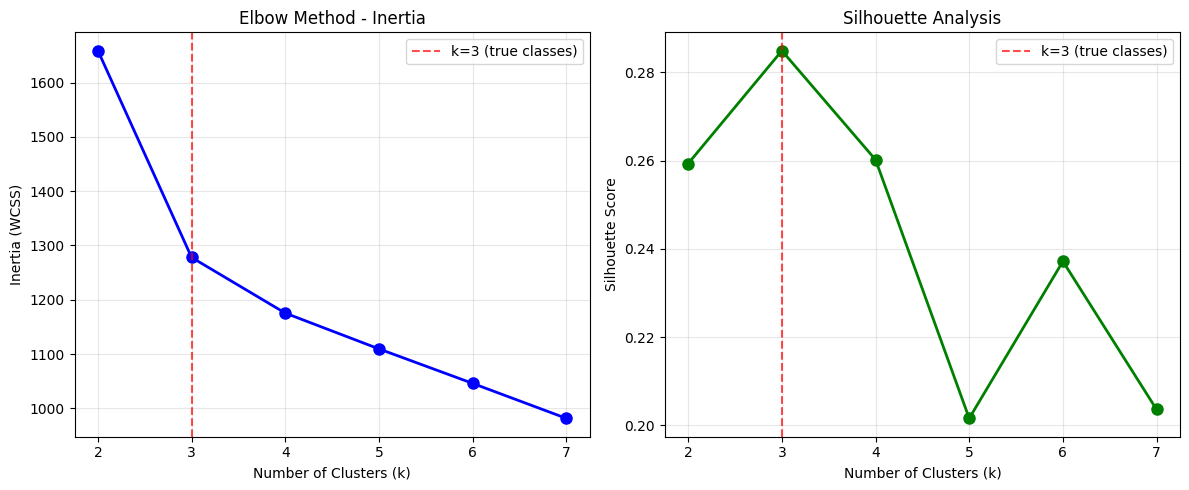

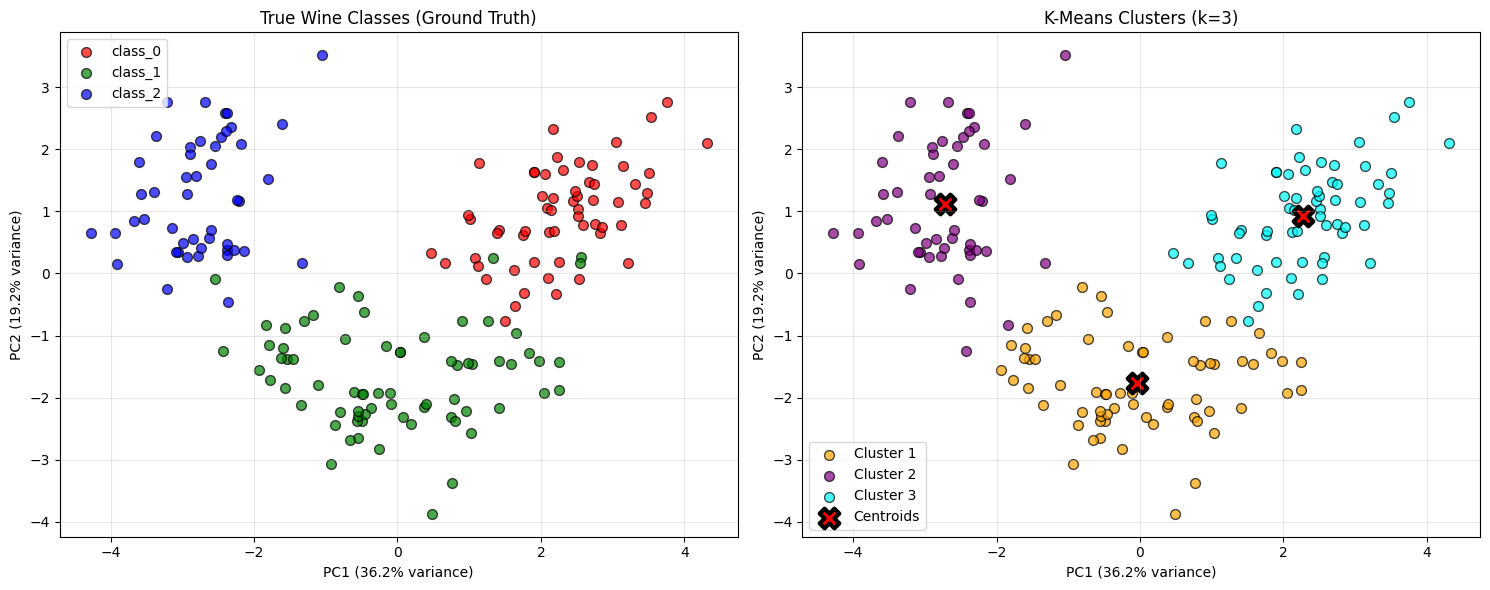

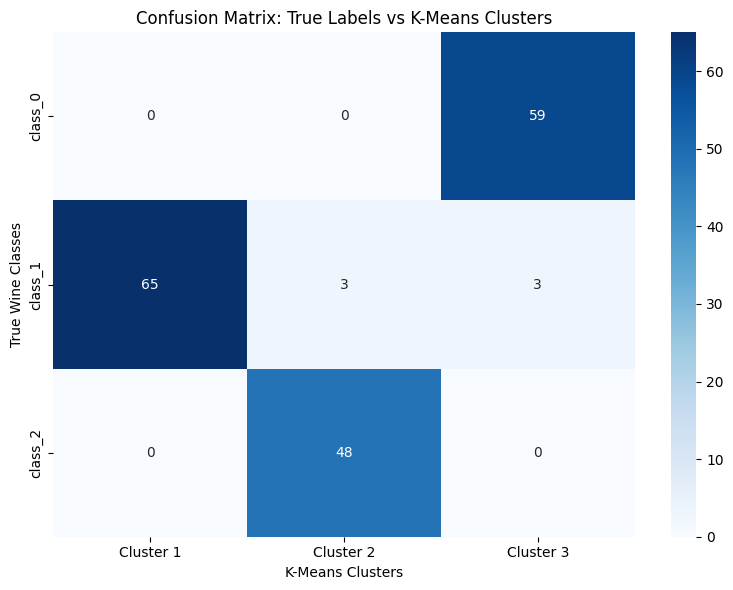

📈 Clustering Performance Summary:
-----------------------------------
Silhouette Score: 0.2849
  Interpretation: Fair (0.25-0.5)

Adjusted Rand Index: 0.8975
  Interpretation: Good (0.7-0.9)

📊 Cluster Sizes:
  Cluster 1: 65 samples (36.5%)
  Cluster 2: 51 samples (28.7%)
  Cluster 3: 62 samples (34.8%)

✅ K-Means successfully grouped the 178 wines into 3 clusters!
   The algorithm found natural groupings in the chemical composition data.


In [13]:
# Implement K-Means Clustering on Wine Dataset

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

print("🍇 K-Means Clustering on Wine Dataset")
print("=" * 50)

# Use the scaled data from PCA (X_wine_scaled)
# Since we know there are 3 wine classes, let's try k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_wine_scaled)

print(f"📊 K-Means Results (k={k}):")
print("-" * 30)

# Calculate clustering metrics
silhouette_avg = silhouette_score(X_wine_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")
print("  (Higher is better, range: -1 to 1)")

# Calculate inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f"Inertia (WCSS): {inertia:.2f}")
print("  (Lower is better - measures cluster tightness)")

# Compare with true labels (ARI - Adjusted Rand Index)
ari_score = adjusted_rand_score(y_wine, cluster_labels)
print(f"Adjusted Rand Index: {ari_score:.4f}")
print("  (Higher is better, 1.0 = perfect match with true labels)")
print()

# Elbow Method to find optimal k
print("🔍 Elbow Method - Finding Optimal k:")
print("-" * 35)

inertias = []
silhouette_scores = []
k_range = range(2, 8)

for k_test in k_range:
    kmeans_test = KMeans(n_clusters=k_test, random_state=42, n_init=10)
    labels_test = kmeans_test.fit_predict(X_wine_scaled)
    inertias.append(kmeans_test.inertia_)
    silhouette_scores.append(silhouette_score(X_wine_scaled, labels_test))

# Plot elbow method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Inertia plot
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (WCSS)')
ax1.set_title('Elbow Method - Inertia')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3 (true classes)')
ax1.legend()

# Silhouette plot
ax2.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3 (true classes)')
ax2.legend()

plt.tight_layout()
plt.show()

# Visualize clusters in 2D (using PCA projection)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_wine_scaled)

plt.figure(figsize=(15, 6))

# Plot 1: True labels
plt.subplot(1, 2, 1)
colors_true = ['red', 'green', 'blue']
for i, (name, color) in enumerate(zip(target_names_wine, colors_true)):
    mask = y_wine == i
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
               c=color, label=name, alpha=0.7, s=50, edgecolors='black')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('True Wine Classes (Ground Truth)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: K-means clusters
plt.subplot(1, 2, 2)
colors_clusters = ['orange', 'purple', 'cyan']
for i in range(k):
    mask = cluster_labels == i
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
               c=colors_clusters[i], label=f'Cluster {i+1}', alpha=0.7, s=50, edgecolors='black')

# Plot centroids
centroids_pca = pca_2d.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
           c='red', marker='X', s=200, linewidths=3, edgecolors='black', label='Centroids')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('K-Means Clusters (k=3)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrix: True labels vs Clusters
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_wine, cluster_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i+1}' for i in range(k)],
            yticklabels=target_names_wine)
plt.xlabel('K-Means Clusters')
plt.ylabel('True Wine Classes')
plt.title('Confusion Matrix: True Labels vs K-Means Clusters')
plt.tight_layout()
plt.show()

print("📈 Clustering Performance Summary:")
print("-" * 35)
print(f"Silhouette Score: {silhouette_avg:.4f}")
print("  Interpretation:" +
      (" Excellent (0.7+)" if silhouette_avg >= 0.7 else
       " Good (0.5-0.7)" if silhouette_avg >= 0.5 else
       " Fair (0.25-0.5)" if silhouette_avg >= 0.25 else " Poor (<0.25)"))

print(f"\nAdjusted Rand Index: {ari_score:.4f}")
print("  Interpretation:" +
      (" Excellent (0.9+)" if ari_score >= 0.9 else
       " Good (0.7-0.9)" if ari_score >= 0.7 else
       " Fair (0.5-0.7)" if ari_score >= 0.5 else " Poor (<0.5)"))

# Show cluster characteristics
print(f"\n📊 Cluster Sizes:")
for i in range(k):
    size = np.sum(cluster_labels == i)
    percentage = (size / len(cluster_labels) * 100).round(1)
    print(f"  Cluster {i+1}: {size} samples ({percentage}%)")

print(f"\n✅ K-Means successfully grouped the {len(X_wine)} wines into {k} clusters!")
print("   The algorithm found natural groupings in the chemical composition data.")

**Gaussian Mixture Models (GMM) Clustering**

GMM is a probabilistic clustering method that assumes data points are generated from a mixture of Gaussian distributions. Unlike k-means which assigns hard cluster memberships, GMM provides soft assignments with probabilities.

**🎯 How GMM Works:**

1. **Assume** data comes from k Gaussian distributions
2. **Initialize** parameters: means (μ), covariances (Σ), and mixing coefficients (π)
3. **E-step**: Calculate probability of each point belonging to each cluster
4. **M-step**: Update parameters to maximize likelihood
5. **Repeat** until convergence

**📊 Key Concepts:**
- **Soft Clustering**: Points have probabilities of belonging to multiple clusters
- **Expectation-Maximization (EM)**: Iterative algorithm for parameter estimation
- **AIC/BIC**: Model selection criteria (lower is better)
- **Covariance Types**: Spherical, diagonal, tied, or full covariance matrices

**✅ Advantages:**
- More flexible than k-means (elliptical clusters)
- Provides uncertainty estimates
- Can model complex cluster shapes
- Probabilistic interpretation

**❌ Limitations:**
- More computationally expensive
- Sensitive to initialization
- Can overfit with too many components
- Assumes Gaussian distributions